In [31]:
import pandas as pd
from zeroshot_nli_engine import misogyny_zsnli
from sklearn.metrics import classification_report
from tqdm import tqdm
import numpy as np

In [3]:
test_set = pd.read_csv('../datasets/biasly/biasly_prepared_df.csv')

In [13]:
raw_probs = []

for index in tqdm(test_set.index):
    raw_probs.append(misogyny_zsnli(test_set['datapoint'][index])['scores'][0])

100%|█████████████████████████████████████████████████████████████████████████████| 12697/12697 [06:47<00:00, 31.19it/s]


In [25]:
test_set['raw_results'] = raw_probs

In [32]:
test_set['ZSNLI_class'] = [float(np.round(x)) for x in raw_probs]

In [16]:
import seaborn as sns

<Axes: xlabel='None', ylabel='raw_results'>

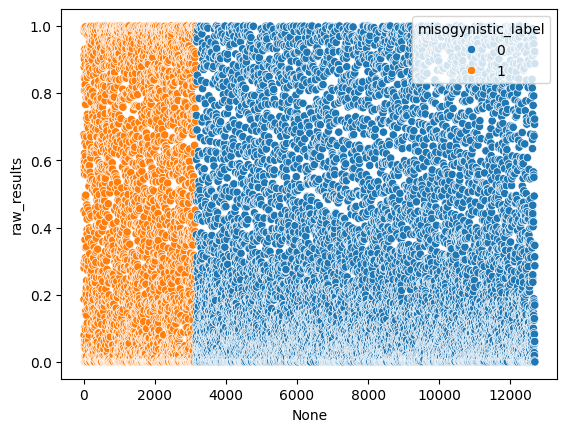

In [30]:
sns.scatterplot(data = test_set, y='raw_results', x=test_set.index, hue="misogynistic_label")

In [36]:
print(classification_report(test_set["misogynistic_label"], test_set['ZSNLI_class']))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      9538
           1       0.38      0.48      0.43      3159

    accuracy                           0.68     12697
   macro avg       0.60      0.61      0.60     12697
weighted avg       0.71      0.68      0.69     12697



In [37]:
test_set['raw_results'] 

0        0.676585
1        0.186356
2        0.279752
3        0.079231
4        0.450251
           ...   
12692    0.169233
12693    0.887820
12694    0.346652
12695    0.286117
12696    0.000125
Name: raw_results, Length: 12697, dtype: float64